# Linear V/S Tree Based Models

Package Import

In [1]:
#Importing Packages
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lime
import lime.lime_tabular
import shap
from xgboost import plot_tree
import os
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.ensemble import GradientBoostingClassifier
import operator
from sklearn import tree
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn_gbmi import *
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,7)
import warnings
warnings.filterwarnings("ignore")

C:\Users\Salim\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Read the Credit Card Default Dataset (This Dataset is downloaded from UCI Machine Learning Repository)

Link to the Dataset :- https://archive.ics.uci.edu/ml/machine-learning-databases/00350/

In [2]:
data=pd.read_excel("default of credit card clients.xls")

Let's have a glimpse of the dataset

In [3]:
data.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

The first step of understanding any dataset is to look at its distribution.

We can see that there are lot of categorical variables which are dummy coded columns like SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6

In [4]:
data.describe().T

count           mean            std       min  \
ID                          30000.0   15000.500000    8660.398374       1.0   
LIMIT_BAL                   30000.0  167484.322667  129747.661567   10000.0   
SEX                         30000.0       1.603733       0.489129       1.0   
EDUCATION                   30000.0       1.853133       0.790349       0.0   
MARRIAGE                    30000.0       1.551867       0.521970       0.0   
AGE                         30000.0      35.485500       9.217904      21.0   
PAY_0                       30000.0      -0.016700       1.123802      -2.0   
PAY_2                       30000.0      -0.133767       1.197186      -2.0   
PAY_3                       30000.0      -0.166200       1.196868      -2.0   
PAY_4                       30000.0      -0.220667       1.169139      -2.0   
PAY_5                       30000.0      -0.266200       1.133187      -2.0   
PAY_6                       30000.0      -0.291100       1.149988      -2.0   
BILL_AMT1                   30000.0   51223.330900   73635.860576 -165580.0   
BILL_AMT2                   30000.0   49179.075167   71173.768783  -69777.0   
BILL_AMT3                   30000.0   47013.154800   69349.387427 -157264.0   
BILL_AMT4                   30000.0   43262.948967   64332.856134 -170000.0   
BILL_AMT5                   30000.0   40311.400967   60797.155770  -81334.0   
BILL_AMT6                   30000.0   38871.760400   59554.107537 -339603.0   
PAY_AMT1                    30000.0    5663.580500   16563.280354       0.0   
PAY_AMT2                    30000.0    5921.163500   23040.870402       0.0   
PAY_AMT3                    30000.0    5225.681500   17606.961470       0.0   
PAY_AMT4                    30000.0    4826.076867   15666.159744       0.0   
PAY_AMT5                    30000.0    4799.387633   15278.305679       0.0   
PAY_AMT6                    30000.0    5215.502567   17777.465775       0.0   
default payment next month  30000.0       0.221200       0.415062       0.0   

                                 25%       50%        75%        max  
ID                           7500.75   15000.5   22500.25    30000.0  
LIMIT_BAL                   50000.00  140000.0  240000.00  1000000.0  
SEX                             1.00       2.0       2.00        2.0  
EDUCATION                       1.00       2.0       2.00        6.0  
MARRIAGE                        1.00       2.0       2.00        3.0  
AGE                            28.00      34.0      41.00       79.0  
PAY_0                          -1.00       0.0       0.00        8.0  
PAY_2                          -1.00       0.0       0.00        8.0  
PAY_3                          -1.00       0.0       0.00        8.0  
PAY_4                          -1.00       0.0       0.00        8.0  
PAY_5                          -1.00       0.0       0.00        8.0  
PAY_6                          -1.00       0.0       0.00        8.0  
BILL_AMT1                    3558.75   22381.5   67091.00   964511.0  
BILL_AMT2                    2984.75   21200.0   64006.25   983931.0  
BILL_AMT3                    2666.25   20088.5   60164.75  1664089.0  
BILL_AMT4                    2326.75   19052.0   54506.00   891586.0  
BILL_AMT5                    1763.00   18104.5   50190.50   927171.0  
BILL_AMT6                    1256.00   17071.0   49198.25   961664.0  
PAY_AMT1                     1000.00    2100.0    5006.00   873552.0  
PAY_AMT2                      833.00    2009.0    5000.00  1684259.0  
PAY_AMT3                      390.00    1800.0    4505.00   896040.0  
PAY_AMT4                      296.00    1500.0    4013.25   621000.0  
PAY_AMT5                      252.50    1500.0    4031.50   426529.0  
PAY_AMT6                      117.75    1500.0    4000.00   528666.0  
default payment next month      0.00       0.0       0.00        1.0

# Train Test Split

We would use Target encoding for the dummy coded columns

But before doing any operations like Target encoding or normalization we should first split the data into train and test.

Because if we don't we would be using information from test data as well which is called DATA LEAKAGE and not acceptable

In [5]:
X_train, X_test, y_train, y_test=train_test_split(data,data['default payment next month'],
                                                  stratify=data['default payment next month'], 
                                                  test_size=0.2, random_state=42)

We would be splitting the dataset into 80% training and 20% testing in such a way that the overall bad rate remains the same across all the datasets i.e. Stratified Sampling

Sklearn's train_test_split function has this argument called "stratify" which helps to do stratified sampling

In [6]:
print("Bad Rate for Full Dataset :-",data['default payment next month'].mean())
print("Bad Rate for Training Dataset :-",y_train.mean())
print("Bad Rate for Testing Dataset :-",y_test.mean())

Bad Rate for Full Dataset :- 0.2212
Bad Rate for Training Dataset :- 0.22120833333333334
Bad Rate for Testing Dataset :- 0.22116666666666668


# Encoding Categorical Variables- Target Encoding

We would be using Target encoding to encode these variables

Example:-
Let's say SEX has 2 categories M and F. There are 100 M & 100 F in the dataset .
Out of 100 M 20 M default and out of 100 F 15 F default.
So the SEX column would be having 0.2 instead of M and 0.15 instead of F

This type of encoding is very intuitive and useful as it uses information from the underlying data 

In [7]:
cols_to_encode=['SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
enc = TargetEncoder(cols=cols_to_encode).fit(X_train, X_train['default payment next month'])
X_train_encoded = enc.transform(X_train)
X_test_encoded = enc.transform(X_test)

In [8]:
X_train_encoded.head()

ID  LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0  \
22788  22789     160000  0.206490   0.237562  0.210370  0.193689  0.693639   
29006  29007     150000  0.206490   0.192904  0.210370  0.198718  0.343667   
16950  16951      10000  0.243728   0.237562  0.233015  0.243243  0.343667   
22280  22281     220000  0.206490   0.192904  0.210370  0.194531  0.128003   
11346  11347     310000  0.206490   0.192904  0.210370  0.192670  0.343667   

          PAY_2     PAY_3     PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
22788  0.556121  0.578125  0.526357  ...     164310     162681     163005   
29006  0.159752  0.155504  0.185792  ...          0          0          0   
16950  0.556121  0.175689  0.184598  ...       8067       8227       8400   
22280  0.159548  0.175689  0.184598  ...     218513     131660     134346   
11346  0.179538  0.155504  0.184598  ...        326       -235       -235   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
22788     15000         0         0      6100     12300      6100   
29006        53         0         0         0         0         0   
16950         2      1281      1134       294       305      1000   
22280      9100      9000      7887      4800      4900      6000   
11346         0       326         0         0         0      1200   

       default payment next month  
22788                           0  
29006                           0  
16950                           0  
22280                           1  
11346                           0  

[5 rows x 25 columns]

In [9]:
X_test_encoded.head()

ID  LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0  \
6907    6908      50000  0.243728   0.237562  0.210370  0.271910  0.166335   
24575  24576     150000  0.243728   0.192904  0.233015  0.187940  0.166335   
26766  26767      50000  0.243728   0.237562  0.210370  0.253125  0.128003   
2156    2157     290000  0.206490   0.192904  0.210370  0.253125  0.128003   
3179    3180     500000  0.206490   0.237562  0.233015  0.211893  0.126934   

          PAY_2     PAY_3     PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
6907   0.159752  0.155504  0.159347  ...       2650       3320       2764   
24575  0.159752  0.180122  0.185792  ...          0          0      11694   
26766  0.159548  0.175689  0.184598  ...      49949      50479      50702   
2156   0.159548  0.175689  0.184598  ...     248801     241983     230925   
3179   0.179538  0.180122  0.185792  ...      10000      10000      10000   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
6907      26060         0      3472      2320      1764      2841   
24575         0         0         0         0     11694     30000   
26766      1800      1844      2200      2000      1800      2038   
2156      15000     10500     10000     15000      7844     23333   
3179       9983     13587     10000     10000     10000     25304   

       default payment next month  
6907                            0  
24575                           0  
26766                           0  
2156                            1  
3179                            0  

[5 rows x 25 columns]

# Data Normalization- MinMax Scaler

Since the values of the columns have different ranges it is necessary to get them on the same range

Tree based models won't be affected by different ranges but Logistic regression would be affected

Hence we use MinMaxScaler and convert all columns in the range(0,1)

normalized_value= (original_value-minimum value in that column) / (maximum value in that column-minimum value in that column)

In [10]:
cols=[col for col in X_train_encoded.columns if col not in ['ID','default payment next month']]
minmax = MinMaxScaler()
X_train_encoded_std = pd.DataFrame(minmax.fit_transform(X_train_encoded[cols]),columns=cols)
X_test_encoded_std = pd.DataFrame(minmax.transform(X_test_encoded[cols]),columns=cols)            

# Model Fitting

Training a Logistic Regression Model and a Gradient Boosting Machine Model and compare the performance

In [11]:
lr=LogisticRegression(random_state=42)
lr.fit(X_train_encoded_std,y_train)

gbm=GradientBoostingClassifier(max_depth=2,subsample=0.7,random_state=42)
gbm.fit(X_train_encoded_std,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Train and Test Area Under the Curve for Logistic Regression Model without Normalization

In [12]:
lr_unnorm=LogisticRegression(random_state=42)
lr_unnorm.fit(X_train_encoded[cols],y_train)
train_auc=roc_auc_score(y_train,lr_unnorm.predict_proba(X_train_encoded[cols])[::,1])
test_auc=roc_auc_score(y_test,lr_unnorm.predict_proba(X_test_encoded[cols])[::,1])
print("Area Under the Curve for training dataset without Normalization :-",train_auc)
print("Area Under the Curve for testing dataset without Normalization :-",test_auc)

Area Under the Curve for training dataset without Normalization :- 0.6563953374062268
Area Under the Curve for testing dataset without Normalization :- 0.6356853517722986


Train and Test Area Under the Curve for Logistic Regression Model after Normalization

In [13]:
train_auc=roc_auc_score(y_train,lr.predict_proba(X_train_encoded_std)[::,1])
test_auc=roc_auc_score(y_test,lr.predict_proba(X_test_encoded_std)[::,1])
print("Area Under the Curve for training dataset after Normalization :-",train_auc)
print("Area Under the Curve for testing dataset after Normalization :-",test_auc)

Area Under the Curve for training dataset after Normalization :- 0.768075515154768
Area Under the Curve for testing dataset after Normalization :- 0.7484928006791085


Train and Test Area Under the Curve for Gradient Boosting Machine Model

In [14]:
train_auc=roc_auc_score(y_train,gbm.predict_proba(X_train_encoded_std)[::,1])
test_auc=roc_auc_score(y_test,gbm.predict_proba(X_test_encoded_std)[::,1])
print("Area Under the Curve for training dataset :-",train_auc)
print("Area Under the Curve for testing dataset :-",test_auc)

Area Under the Curve for training dataset :- 0.7939070791315723
Area Under the Curve for testing dataset :- 0.7728845549422028


As seen from above Logistic Regression is affected if the data is not Normalized whereas Tree Based Models are not.

However it is always a good practice to Normalize your data before fitting any model

# Interaction Effects-Friedman and Popescu's H statistics

Since the Tree Based models automatically capture the interaction between the variables it would be useful to understand how the variables interact with each other

We are calculating the interaction terms using Friedman and Popescu's H statistics

Here we are calculating interaction strength only in pairs of 2 for all the variables since we have given a max depth of 2,so the interaction strength for pairs of 3 would be too low,saying that we can also calculate it using the same function as mentioned below

The values of Interaction Strength ranges from 0 to 1 where 0 denotes no interaction whereas 1 denotes maximum interaction

In [15]:
two_pair_interaction=h_all_pairs(gbm,X_train_encoded_std)

In [16]:
two_pair_interaction=pd.DataFrame(list(two_pair_interaction.items()), columns=['Pair', 'Interaction_Strength'])
two_pair_interaction.sort_values(by='Interaction_Strength',ascending=False,inplace=True)

In [17]:
two_pair_interaction.head(20)

Pair  Interaction_Strength
214   (BILL_AMT3, PAY_AMT4)              0.252138
218  (BILL_AMT4, BILL_AMT6)              0.200209
196   (BILL_AMT1, PAY_AMT5)              0.181811
23          (SEX, MARRIAGE)              0.147972
98          (AGE, PAY_AMT5)              0.135772
180      (PAY_6, BILL_AMT6)              0.135437
194   (BILL_AMT1, PAY_AMT3)              0.129124
187  (BILL_AMT1, BILL_AMT2)              0.125175
207   (BILL_AMT2, PAY_AMT6)              0.122110
231   (BILL_AMT5, PAY_AMT6)              0.121351
14   (LIMIT_BAL, BILL_AMT5)              0.117025
94          (AGE, PAY_AMT1)              0.115840
206   (BILL_AMT2, PAY_AMT5)              0.115817
100          (PAY_0, PAY_2)              0.112845
41          (SEX, PAY_AMT5)              0.109636
212   (BILL_AMT3, PAY_AMT2)              0.105694
192   (BILL_AMT1, PAY_AMT1)              0.096308
88         (AGE, BILL_AMT1)              0.093805
191  (BILL_AMT1, BILL_AMT6)              0.092456
185       (PAY_6, PAY_AMT5)              0.089965

Since the interaction between Bill Amount 3 & Bill Amount 4 is the highest we would like to see the values at which they interact.

This can be done by plotting a 3D partial dependence plot where X-axis denotes the values of Bill Amount 3,Y-axis denotes the values of Bill Amount 4 and the values with the colour code denotes the interaction strength

Text(0, 0.5, 'Bill Amount 4')

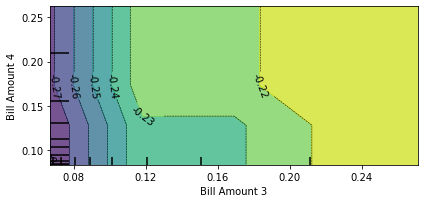

In [18]:
fig, axs =plot_partial_dependence(gbm,
                        features=[(13,14)],
                        X=X_train_encoded_std,
                        grid_resolution=5)
plt.xlabel("Bill Amount 3")
plt.ylabel("Bill Amount 4")

# Tree Visualization

We can also visualize each of the individual Trees from GBM model with the pydotplus and graphviz function 

Below we have plotted the 0th and 99th tree.While plotting the 100th tree it throws an index error as shown below because we have built only 100 trees and in Python range starts from 0,so 99th tree is the last(100th) tree

In [19]:
os.environ["PATH"] += os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin' #Specify your path name

------------------------------------------------------------ Tree 0 ------------------------------------------------------------


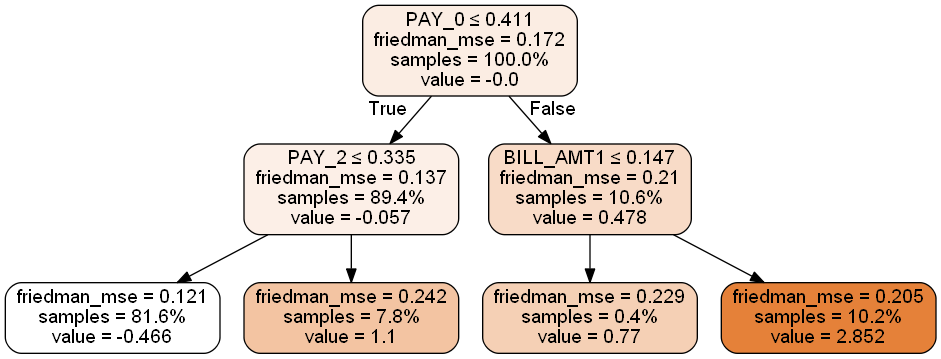

In [20]:
print("-"*60,"Tree 0","-"*60)
dot_data = StringIO() 
dot_data = tree.export_graphviz(
    gbm.estimators_[0, 0],
    out_file=None, filled=True,
    rounded=True,  
    special_characters=True,
    proportion=True,
    feature_names=cols,
)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

------------------------------------------------------------ Tree 99 ------------------------------------------------------------


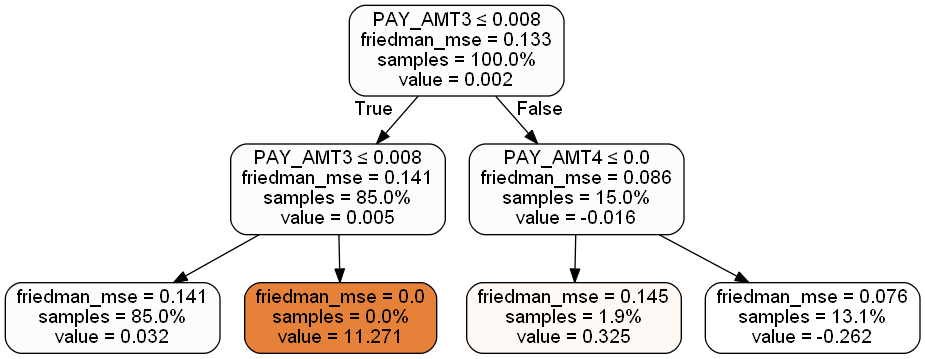

In [21]:
print("-"*60,"Tree 99","-"*60)
dot_data = StringIO() 
dot_data = tree.export_graphviz(
    gbm.estimators_[99, 0],
    out_file=None, filled=True,
    rounded=True,  
    special_characters=True,
    proportion=True,
    feature_names=cols,
)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

Since we have fitted 100 trees in GBM we would be able to visualize all 100 trees 

In Python indexing starts from 0,so 100th tree would be at index 99 and if we try to get a tree at index 100 we would be getting IndexError

In [22]:
print("-"*60,"Tree 100","-"*60)
dot_data = StringIO() 
dot_data = tree.export_graphviz(
    gbm.estimators_[100, 0],
    out_file=None, filled=True,
    rounded=True,  
    special_characters=True,
    proportion=True,
    feature_names=cols,
)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

------------------------------------------------------------ Tree 100 ------------------------------------------------------------


IndexError: index 100 is out of bounds for axis 0 with size 100

# Global Interpretation

--Feature Importance

--Partial Dependence Plot

--Surrogate Models

# Feature Importance

let's have a look at the features which were important in all the models.

We would use Wald Chisquare as a measure for Logistic Regression and Information Gain as a measure for GBM

In [23]:
#Wald ChiSquare for Logistic Regression
predProbs = lr.predict_proba(X_train_encoded_std)
X_design = np.hstack([np.ones((X_train_encoded_std.shape[0], 1)), X_train_encoded_std])
V = np.diagflat(np.product(predProbs, axis=1))
covLogit = np.linalg.inv(np.dot(np.dot(X_design.T, V), X_design))

# Wald statistic (coefficient / s.e.) ^ 2
logitParams = np.insert(lr.coef_, 0, lr.intercept_)
waldtable=pd.DataFrame(cols+[pd.np.nan],columns=['Variables']).shift(1)
waldtable.iloc[0,0]='Intercept'
waldtable['Wald_Chisquare']=(logitParams / np.sqrt(np.diag(covLogit))) ** 2
waldtable.sort_values(by=['Wald_Chisquare'],ascending=False,inplace=True)
waldtable

Variables  Wald_Chisquare
6       PAY_0     1165.171488
1   LIMIT_BAL       59.963865
0   Intercept       53.995950
5         AGE       25.113003
8       PAY_3       21.894946
11      PAY_6       19.216721
4    MARRIAGE       18.743615
2         SEX       18.169662
9       PAY_4       12.532971
7       PAY_2       11.373988
10      PAY_5        7.488459
3   EDUCATION        4.329602
18   PAY_AMT1        2.476905
23   PAY_AMT6        2.095019
19   PAY_AMT2        0.912995
22   PAY_AMT5        0.607384
21   PAY_AMT4        0.496382
20   PAY_AMT3        0.303875
17  BILL_AMT6        0.245355
13  BILL_AMT2        0.143260
12  BILL_AMT1        0.077302
16  BILL_AMT5        0.046652
14  BILL_AMT3        0.015576
15  BILL_AMT4        0.001539

In [24]:
#Information Gain for GBM Model
feat_imp=list(zip(cols,gbm.feature_importances_))
feat_imp.sort(key=operator.itemgetter(1),reverse=True)
feat_imp=pd.DataFrame(feat_imp,columns=['Variables','Feature Importance'])
feat_imp

Variables  Feature Importance
0       PAY_0            0.651420
1       PAY_2            0.072581
2       PAY_3            0.041339
3       PAY_4            0.033014
4   LIMIT_BAL            0.026270
5    PAY_AMT2            0.024245
6       PAY_6            0.022716
7   BILL_AMT1            0.021757
8       PAY_5            0.019515
9    PAY_AMT3            0.015429
10   PAY_AMT1            0.015419
11        AGE            0.008811
12   PAY_AMT6            0.008654
13   PAY_AMT5            0.007571
14  BILL_AMT2            0.006922
15  EDUCATION            0.005212
16  BILL_AMT3            0.004083
17  BILL_AMT6            0.003987
18   PAY_AMT4            0.003963
19   MARRIAGE            0.003091
20        SEX            0.001703
21  BILL_AMT5            0.001254
22  BILL_AMT4            0.001043

# Partial Dependence Plot

Since PAY_0, PAY_2, PAY_3 are the top 3 variables in both the Tree based models (XGBoost & GBM), we would like to understand the relationship that the model has learnt for these variables (i.e. Linear/Non-Linear)

We are using Partial Dependence Plot which shows the marginal effect each of these variables have on the predicted outcome of GBM model

Note that we are calculating PDP plots for GBM model and the same can be done for XGBoost model

The X-axis in the below plots shows the value of the variables(it ranges from 0 to 1 since we have normalized them above) and the Y-axis shows the relative logit contribution of the variable on the class probability.

When p=0.7,then logit=(p/(1-p))=0.84729

When p=0.5,then logit=(p/(1-p))=0

When p=0.3,then logit=(p/(1-p))=-0.84729

So the negative values on the y-axis denotes that the variable is causing the probability to go towards 0 while the positive values pushes it towards 1

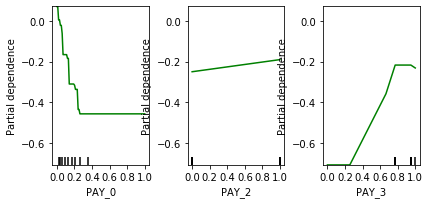

In [25]:
my_plots = plot_partial_dependence(gbm,       
                                   features=['PAY_0','PAY_2','PAY_3'], # Name of the column for which we want to show the plot
                                   X=X_train_encoded_std,            # raw predictors data.
                                   feature_names=cols[5:9], # labels on graphs
                                   grid_resolution=10000) # number of values to plot on x axis

# Surrogate Models

1.) Start with some black-box predictive model.On some dataset X, get the  predictions ŷ from the model.

2.) Train an interpretable regression model (Decision Tree or Linear Regression) on the dataset X and the  model predictions ŷ.

3.) Measure how well the surrogate model reproduces the output of the black-box  model.

In [26]:
from sklearn.tree import DecisionTreeRegressor
gbm_pred=gbm.predict_proba(X_train_encoded_std[cols])[:,1]
surr_model_dt=DecisionTreeRegressor(max_depth=3)
surr_model_dt.fit(X_train_encoded_std[cols],gbm_pred)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

First we fit a Decision Tree Regressor

The R-squared value is 0.89 which means our surrogate Decision Tree is able to explain the GBM model with 89% accuracy

In [27]:
surr_model_dt.score(X_train_encoded_std[cols],gbm_pred)

0.8979662586637314

Let's visualize how the surrogate tree looks

This tree is a proxy of the GBM model and will help us to understand the relationship between the variables

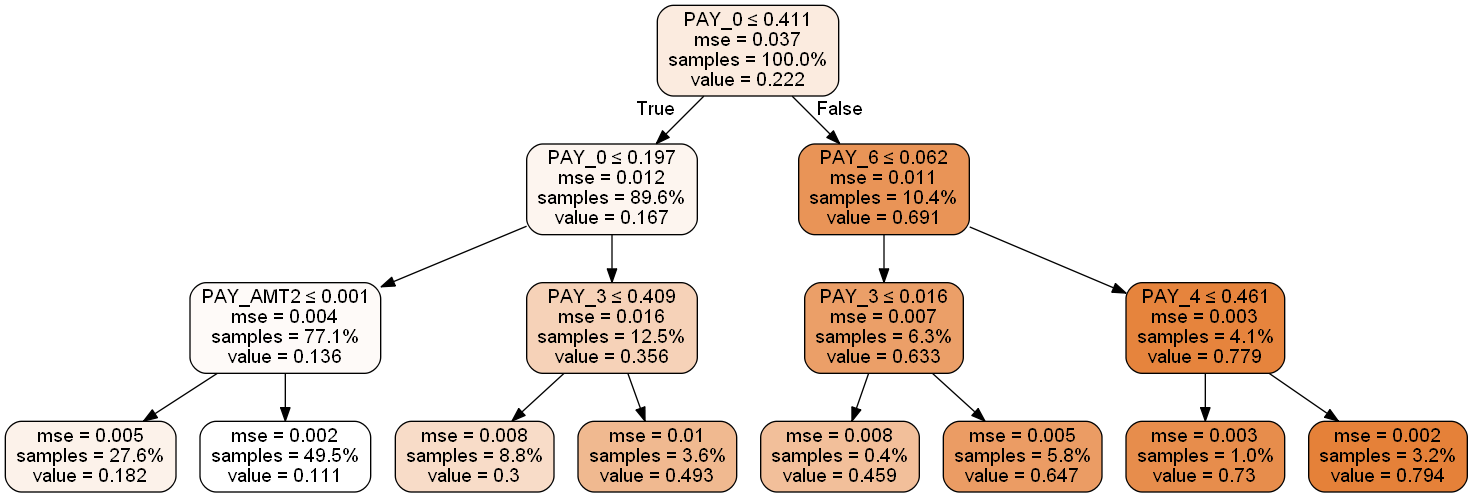

In [28]:
dot_data = StringIO() 
dot_data = tree.export_graphviz(
    surr_model_dt,
    out_file=None, filled=True,
    rounded=True,  
    special_characters=True,
    proportion=True,
    feature_names=cols,
)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

We can also fit a Linear Regression Model to approximate our GBM model

The R-squared value is 0.94 which means our surrogate Linear Regression is able to explain the GBM model with 94% accuracy

In [29]:
from sklearn.linear_model import LinearRegression
gbm_pred=gbm.predict_proba(X_train_encoded_std[cols])[:,1]
surr_model_lr=LinearRegression()
surr_model_lr.fit(X_train_encoded_std[cols],gbm_pred)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
surr_model_lr.score(X_train_encoded_std[cols],gbm_pred)

0.9445110577165602

The variable weightage would not be the same in GBM model but the signs of the variable will help us to understand how the variable behaves globally

Given Below are the variables,it's coefficients and the sign of the variables

In [31]:
coeff=pd.DataFrame(["Intercept"]+cols,columns=['Variables'])
coeff['Co_Efficients']=[surr_model_lr.intercept_]+list(surr_model_lr.coef_)
coeff['Signs']=np.where(coeff['Co_Efficients']<0,"-","+")
coeff

Variables  Co_Efficients Signs
0   Intercept       0.004841     +
1   LIMIT_BAL      -0.136026     -
2         SEX       0.012530     +
3   EDUCATION       0.040793     +
4    MARRIAGE       0.062463     +
5         AGE       0.197382     +
6       PAY_0       0.483910     +
7       PAY_2       0.083496     +
8       PAY_3       0.089149     +
9       PAY_4       0.103893     +
10      PAY_5       0.083273     +
11      PAY_6       0.098524     +
12  BILL_AMT1       0.089739     +
13  BILL_AMT2       0.066103     +
14  BILL_AMT3      -0.120947     -
15  BILL_AMT4      -0.047505     -
16  BILL_AMT5       0.047507     +
17  BILL_AMT6      -0.061013     -
18   PAY_AMT1      -0.290932     -
19   PAY_AMT2      -0.144934     -
20   PAY_AMT3      -0.076152     -
21   PAY_AMT4      -0.101172     -
22   PAY_AMT5      -0.049009     -
23   PAY_AMT6      -0.063080     -

# Local Interpretation Techniques

# LIME - Locally Interpretable Model-Agnostic Explanations


1.) Choose some point x whose output you wish to explain and get the model’s prediction ŷ.

2.) Sample new points by permuting the point x. Let’s call these points X’. Calculate the distance between permutations and      original observations.

3.) Evaluate  these points with your black-box model.  Call these predictions Y’.

4.) Pick m features best describing the complex model outcome from the permuted data.

5.) Fit a simple interpretable model to the permuted data with m features and similarity scores as weights.

6.) Feature weights from the simple model make explanations for the complex models local behavior.



Here we fit the XGBoost model again with the objective function as " binary:logitraw " (which gives us log odds) as it will help us to compare the LIME results with SHAP results

Also we are converting both the training and testing datasets into a matrix otherwise it gives us feature mismatch error if used as it is

Here we are explaining 2 instances of test dataset with 4 features and comparing it with SHAP results

We see below for j=1,PAY_0,PAY_2 & BILL_AMT1 favours class 0 whereas BILL_AMT2 favours class 1

But the R square value is 0.04822627660151302 which is too low,so the interpretation from this is highly unreliable

Whereas for j=10,PAY_3 & BILL_AMT4 favours class 0 whereas PAY_0 & PAY_2 favours class 1

Also the R square value is 0.6607630460972373 which is fairly good,so we can rely on this interpretation to some extent

In [32]:
X_train_encoded_std_mat=X_train_encoded_std.as_matrix()
X_test_encoded_std_mat=X_test_encoded_std.as_matrix()
model=xgb.XGBClassifier(objective="binary:logitraw",n_estimators=2,max_depth=2,subsample=0.7,random_state=42)
model.fit(X_train_encoded_std_mat,y_train)
predict_fn_xgb = lambda x: model.predict_proba(x).astype(float)
# Create the LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_encoded_std_mat,feature_names =X_train_encoded_std.columns.values.tolist(),class_names=['0','1'], 
                                                   kernel_width=3,mode='classification',random_state=42)
# Get the explanation for XGBoost
j=1
exp = explainer.explain_instance(X_test_encoded_std.loc[j], predict_fn_xgb, num_features=4)
exp.show_in_notebook(show_table=True, show_all=False)

In [33]:
print("R squared value :-",exp.score)

R squared value :- 0.046422334253708675


In [34]:
j=10
# Create the LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_encoded_std_mat,feature_names =X_train_encoded_std.columns.values.tolist(),class_names=['0','1'], 
                                                   kernel_width=3,mode='classification',random_state=42)
exp = explainer.explain_instance(X_test_encoded_std.loc[j], predict_fn_xgb, num_features=4)
exp.show_in_notebook(show_table=True, show_all=False)

In [35]:
print("R squared value :-",exp.score)

R squared value :- 0.6744927419678088


Drawbacks of LIME :-
    
1.) Depends on the random sampling of new points,so it can be unstable

2.) Fit of linear model can be inaccurate but we can check the R squared value to know if that's the case or no
    

# SHAP - SHapley Additive exPlanations


It helps you to understand the contribution of each feature in arriving at a probability score

This works locally so it would tell you why each customer got a particular probability score

To understand the technical aspect please refer to https://christophm.github.io/interpretable-ml-book/shapley.html

In [36]:
shap.initjs()

Here we fit the XGBoost model again with the objective function as " binary:logitraw " (which gives us log odds) as it will help us to interpret the SHAP plots easily.

Default objective function is " binary:logistic " which gives us probability values as predicted output

We create an instance of TreeExplainer and calculate the Shapley Values for both train and test dataset

In [37]:
model=xgb.XGBClassifier(objective="binary:logitraw",n_estimators=2,max_depth=2,subsample=0.7,random_state=42)
model.fit(X_train_encoded_std,y_train)

explainerXGB = shap.TreeExplainer(model)
shap_values_XGB_test = explainerXGB.shap_values(X_test_encoded_std)
shap_values_XGB_train = explainerXGB.shap_values(X_train_encoded_std)

In [38]:
b=pd.DataFrame({"Base value": [explainerXGB.expected_value]*X_test_encoded_std.shape[0]})
b.index=X_test_encoded_std.index
j=10
shap.force_plot(
        0, # set base value to zero
        np.hstack([shap_values_XGB_test[j, :], explainerXGB.expected_value]), # add expected value as a bar in the force plot
        pd.concat(
            [X_test_encoded_std, b],
            axis=1,
        ).iloc[j, :], # grabs the identities and values of components
        show=False, # allows saving, etc.
    )


In [39]:
j=1
shap.force_plot(
        0, # set base value to zero
        np.hstack([shap_values_XGB_test[j, :], explainerXGB.expected_value]), # add expected value as a bar in the force plot
        pd.concat(
            [X_test_encoded_std, b],
            axis=1,
        ).iloc[j, :], # grabs the identities and values of components
        show=False, # allows saving, etc.
    )

In the above plot :-

1.) The base value is the mean value of the predictions made on the Training Dataset

2.) The output value is the sum of the SHAP values of all variables for that instance along with the base value.This is same as the prediction (Log Odds) made by the XGBoost model for that instance.SHAP ensures that output value is same as the model prediction which LIME fails to ensure and hence it is more reliable

3.) The values of the variable in the above plot is the actual values for that instance



In [40]:
print("Base Value :-",explainerXGB.expected_value)
print("Mean value of the predictions made on the Train Dataset :-",model.predict_proba(X_train_encoded_std)[:,1].mean())

Base Value :- -0.21379411
Mean value of the predictions made on the Train Dataset :- -0.21361777


In [41]:
print("Output Value from SHAP :-",shap_values_XGB_test[j, :].sum()+explainerXGB.expected_value)
print("XGBoost Model Prediction (Log Odds) :-",model.predict_proba(X_test_encoded_std)[j,1])

Output Value from SHAP :- -0.27321514
XGBoost Model Prediction (Log Odds) :- -0.27321514


For j=1, BILL_AMT1 and PAY_3 favours class 1 whereas PAY_0 and PAY_2 favours class 0

In [42]:
shap_contribution=pd.DataFrame(shap_values_XGB_test[j, :],index=cols,columns=['Shap_Contribution'])
shap_contribution.sort_values(by='Shap_Contribution',ascending=False,inplace=True)
shap_contribution[shap_contribution['Shap_Contribution']!=0]

Shap_Contribution
PAY_3               0.000303
BILL_AMT1           0.000245
PAY_2              -0.017194
PAY_0              -0.042775

In [43]:
X_test_encoded_std.loc[j,shap_contribution[shap_contribution['Shap_Contribution']!=0].index]

PAY_3        0.038198
BILL_AMT1    0.159792
PAY_2        0.000359
PAY_0        0.060557
Name: 1, dtype: float64